<a href="https://colab.research.google.com/github/Af0ns0/Dissertacao2023/blob/main/C%C3%B3pia_de_Time_Serie_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMportante - Um lag e um bloco de dados por ex dados em 16 lags sao dividos em 16 bloco de dados

# ARIMA - Numero de Responsavel Total

(1244,)
(30,)


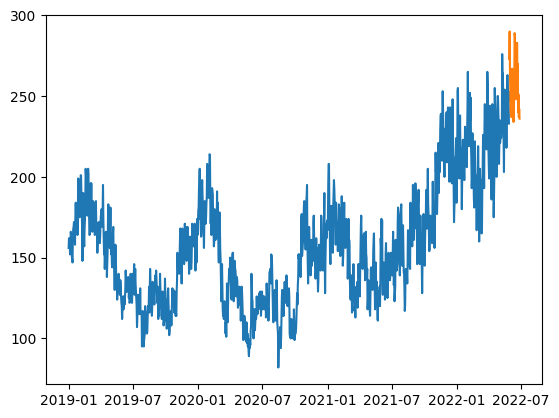

In [ ]:
#creating the train and validation set
nobs = 30
df_train, df_test = df_arima[0:-nobs], df_arima[-nobs:]


# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

plt.plot(df_train)
plt.plot(df_test)

In [ ]:
model = auto_arima(df_train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=12,
                      seasonal=True,
                      start_P=0,
                      D=None,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=9601.821, Time=3.20 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=9794.582, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=9745.130, Time=1.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=9711.272, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=9792.613, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=9660.082, Time=0.64 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=9588.869, Time=3.54 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=9623.973, Time=3.20 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=9570.217, Time=9.31 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=9568.648, Time=6.07 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=9658.646, Time=4.17 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=9682.680, Time=3.50 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=9557.443, Time=8.30 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=9590.209, Time=3.70 sec
 ARIMA(2,1,1)(2,0,1

In [ ]:
# Forecast

prediction, confint = model.predict(n_periods=nobs, return_conf_int=True)

prediction


2022-05-29    249.351965
2022-05-30    270.510098
2022-05-31    270.813471
2022-06-01    262.104614
2022-06-02    256.624504
2022-06-03    243.999027
2022-06-04    234.639675
2022-06-05    249.455418
2022-06-06    270.203364
2022-06-07    270.658380
2022-06-08    262.163954
2022-06-09    256.498256
2022-06-10    243.942470
2022-06-11    234.933170
2022-06-12    249.568535
2022-06-13    269.910848
2022-06-14    270.512529
2022-06-15    262.271714
2022-06-16    256.402059
2022-06-17    243.912953
2022-06-18    235.238013
2022-06-19    249.693157
2022-06-20    269.642876
2022-06-21    270.388927
2022-06-22    262.354219
2022-06-23    256.311151
2022-06-24    243.889081
2022-06-25    235.536205
2022-06-26    249.813085
2022-06-27    269.382528
Freq: D, dtype: float64

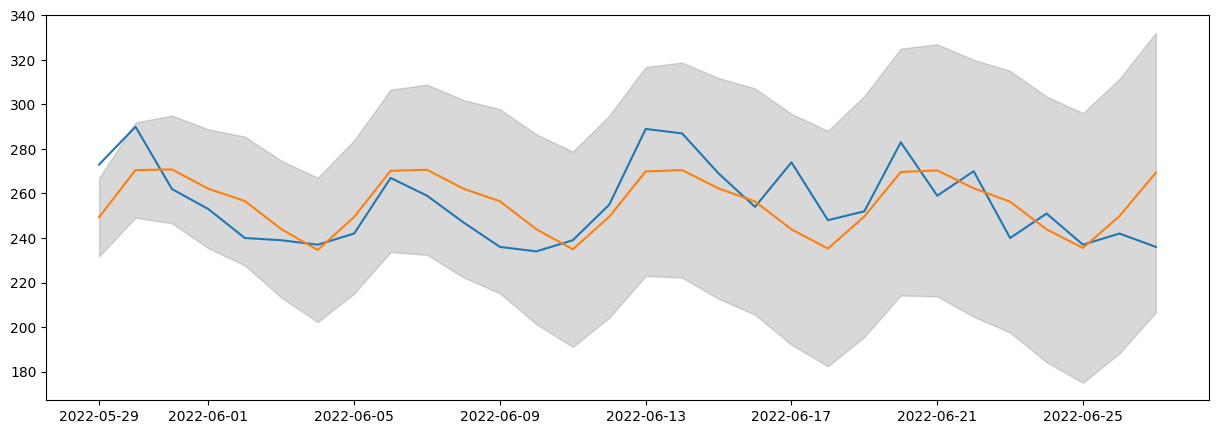

In [ ]:
prediction_series = pd.Series(prediction,index=df_test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df_test)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)